In [1]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import xmatch
from Tools import *

In [3]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v

def LineToRedshift(Obs,Rest):
    return (Obs/Rest)-1

def RedshiftToLine(Obs,z):
    return (Obs/(1+z))

In [4]:
#from astropy import units as u
#from astropy.coordinates import SkyCoord

#CatBino=ReadCatalogs("../Catalogs/Binospec-Candels.cat")
#Jorryt=ReadCatalogs("../Catalogs/jorryt.txt")
#JorrytC=SkyCoord(Jorryt["col2"],Jorryt["col3"])
#idx,d2d=xmatch.xmatch(JorrytC.ra,JorrytC.dec,CatBino["ra_candels"],CatBino["dec_candels"])

In [5]:
CatBino=ReadCatalogs("../Catalogs/Binospec-Candels.cat")
CatBino=CatBino[CatBino["Type"]=="LAE"]
Fresco=ReadCatalogs("../Catalogs/Fresco.cat")

idx,d2d=xmatch.xmatch(CatBino["ra_candels"],CatBino["dec_candels"],Fresco["ra"],Fresco["dec"])
mask=[]
for i,d in zip(idx,d2d):
    print(i,d)
    if d.value<(0.5/3600.):
        mask.append(True)
    else:
        mask.append(False)


CatBino=CatBino[mask]
idx=idx[mask]
d2d=d2d[mask]
Fresco=[Fresco[i] for i in idx]


ids=[]
Fresco2,Bino2 = [],[]

# iterate through each element in the original array
for i,element in enumerate(Fresco):
    # add the element to the new list if it is not already there
    if element["id"] not in ids:
        Fresco2.append(element)
        Bino2.append(CatBino[i])
    else:
        print(CatBino[i]["id_charlotte"])
    ids.append(element["id"])

Fresco=Fresco2
CatBino=Bino2




4194 0d00m24.07933175s
367 0d03m55.98281131s
226 0d01m30.70713808s
226 0d02m09.08242006s
3855 0d00m00.08421078s
5407 0d00m00.0715345s
969 0d02m50.39286278s
10613 0d01m46.33277273s
2137 0d00m49.88724666s
8398 0d00m00.05358262s
8124 0d00m00.0924666s
8721 0d00m00.06845747s
9380 0d00m00.05786819s
3320 0d00m00.23463215s
612 0d00m00.14642126s
6155 0d01m26.04749617s
8749 0d00m00.05477835s
9096 0d00m00.07665319s
7718 0d00m00.03832172s
8826 0d00m00.09653625s
10076 0d01m48.32146383s
10088 0d01m53.09153057s
172 0d03m50.80136215s
4194 0d02m33.11708445s
367 0d03m00.06949832s
367 0d03m55.98281131s
9015 0d01m31.69449109s
1492 0d01m16.40107324s
226 0d02m44.88617218s
226 0d02m38.18255323s
11103 0d02m39.27337798s
11383 0d01m05.47659384s
8167 0d01m19.15824s
8167 0d00m35.26177394s
11075 0d03m16.14341076s
10603 0d02m46.3166024s
9384 0d01m03.63954666s
7850 0d00m49.2488977s
6755 0d00m00.11498051s
7385 0d01m23.84497001s
10583 0d00m00.15168596s
6197 0d00m00.04539901s
5159 0d00m00.02296154s
6486 0d00m00.0031733

In [6]:
i=0
for f,b in zip(Fresco,CatBino):
    print(i,f["id"],b["id_charlotte"])
    i=i+1

0 1068 z5_GNW_12024
1 3104 z6_GNW_14511
2 17056 z6_GND_19165
3 21172 z6_GND_14309
4 3831 z6_GND_36100
5 789 z6_GNW_11543
6 3529 z6_GND_36553
7 27825 z5_GND_7766
8 23355 z7_GND_11401
9 26021 z6_GND_44831
10 28342 z7_GND_43678
11 26881 z7_GND_8358
12 12607 z5_GND_23860
13 1904 z5_GND_39445
14 24946 z5_GND_10047
15 9397 z5_GND_27819
16 15130 z5_GND_21153
17 18352 z5_GND_17752
18 4350 z8_GND_35384
19 16299 Stark11_43_3982
20 30776 Jung18_z6_GND_5752
21 11282 Stark11_33_17705
22 3903 Stark11_32_16773
23 27064 Stark11_34_24923
24 8915 Jung18_z6_GND_28438


In [7]:
LyaFlux=[gal["LyaFlux"] for gal in CatBino]
ids=[gal["id_charlotte"] for gal in CatBino]
ra=[gal["ra_candels"] for gal in CatBino]
dec=[gal["dec_candels"] for gal in CatBino]

LyaFlux=10**np.array(LyaFlux)
lines=ascii.read("../Catalogs/HaLines.cat")
DetectionLimit=2e-18
HaFlux=[]

for f in LyaFlux:
    HaFlux.append(f/0.4/8.7)



In [8]:
count=0
noLyaID=[]
for i,f,r,d in zip(ids,HaFlux,ra,dec):
    if lines[count]["Ha"]=="X" and lines[count]["Oiii"]=="X":
        noLyaID.append(i)
        if f<DetectionLimit:
            print(i,f,r,d,"  Undetectable")
        if f>=DetectionLimit:
            print(i,f,r,d,"  detectable")
    count=count+1

z5_GNW_12024 2.293242272097275e-18 189.14324485 62.17987183   detectable
z6_GND_19165 1.8686969470589247e-18 189.34773322 62.24986594   Undetectable
z6_GND_14309 3.67089473556893e-18 189.33404671 62.26305778   detectable
z6_GNW_11543 9.571340711855586e-19 189.15744108 62.17650152   Undetectable
z7_GND_11401 4.642026979094508e-18 189.18657944 62.27090051   detectable
z7_GND_43678 2.9640550921343075e-18 189.23520109999998 62.29559743   detectable
z5_GND_23860 2.3127111095275763e-18 189.31438453 62.23646055   detectable
z5_GND_10047 9.269522331600624e-19 189.29627745 62.27738622   Undetectable
z8_GND_35384 4.7659084796487606e-18 189.23198934 62.20233294   detectable
Stark11_43_3982 1.2285538062406971e-18 189.0399444 62.24772144   Undetectable
Jung18_z6_GND_5752 8.407211548457917e-18 189.19908156 62.32098098   detectable


In [9]:
import os
FrescMeta={}
for i in range(0,len(CatBino)):
    print(i,Fresco[i]["id"],CatBino[i]["id_charlotte"],CatBino[i]['z'],6564.614*(1+CatBino[i]['z']),Fresco[i]["ra"],CatBino[i]["ra_candels"])
    #if len(str(Fresco[i]["id"]))==5:
        #FrescMeta[str(CatBino[i]["id_charlotte"])]=[str(Fresco[i]["id"]),CatBino[i]['z']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==4:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["0"+str(Fresco[i]["id"]),CatBino[i]['z']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_0'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_0'+str(Fresco[i]["id"])+'.stack.fits')
    #if len(str(Fresco[i]["id"]))==3:
    #    FrescMeta[str(CatBino[i]["id_charlotte"])]=["00"+str(Fresco[i]["id"]),CatBino[i]['z']]
    #    os.system('wget -P ../data/large_files/Fresco/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_00'+str(Fresco[i]["id"])+'.1D.fits')
    #    os.system('wget -P ../data/large_files/Fresco/2D/ https://s3.amazonaws.com/grizli-v2/HST/Pipeline/fresco-gdn-med/Extractions/fresco-gdn-med_00'+str(Fresco[i]["id"])+'.stack.fits')


0 1068 z5_GNW_12024 5.1681896597641295 40491.78419514284 189.14321331 189.14324485
1 3104 z6_GNW_14511 5.616497946275061 43434.75504908851 189.10049518 189.1005376
2 17056 z6_GND_19165 6.049667650225273 46278.34695201593 189.34774799 189.34773322
3 21172 z6_GND_14309 5.9677187764744275 45740.384228106894 189.3340935 189.33404671
4 3831 z6_GND_36100 5.60365711776697 43350.459966492694 189.19125007 189.19127434
5 789 z6_GNW_11543 5.769960179845872 44442.17537605872 189.15741901 189.15744108
6 3529 z6_GND_36553 5.612158889401561 43406.27081558994 189.15632616 189.15639949
7 27825 z5_GND_7766 5.591906181481391 43273.31960563928 189.13921616 189.13929976
8 23355 z7_GND_11401 6.509232237478478 49295.211075402534 189.18654911 189.18657944
9 26021 z6_GND_44831 6.73664539319387 50788.09066119598 189.17510418 189.17513458
10 28342 z7_GND_43678 6.121740345183027 46751.476374353326 189.23517989 189.23520109999998
11 26881 z7_GND_8358 6.8177482738244315 51320.49976682369 189.15526544 189.1553104000

In [10]:
ids=[]
for i,j in zip(Fresco,CatBino):
    if len(str(i["id"])) == 3:
        num = "00" + str(i["id"])
    elif len(str(i["id"])) == 4:
        num = "0" + str(i["id"])
    else:
        num=str(i["id"])
    ids.append(num)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
01068
5.1681896597641295
38208.584494237555 50802.54773372237


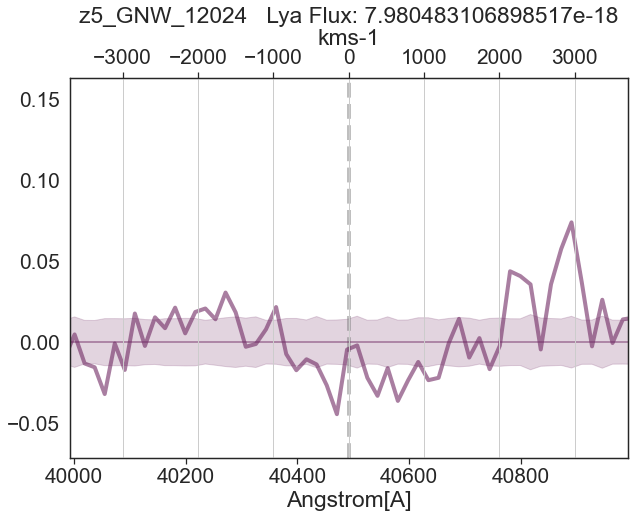

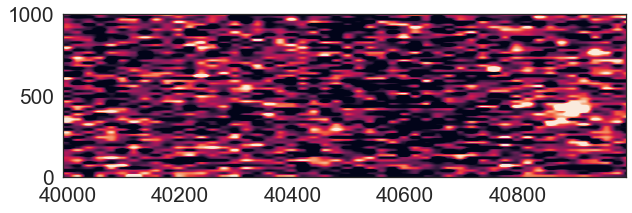

In [21]:
from scipy import interpolate
import ipympl
%load_ext autoreload
%autoreload 
%matplotlib inline

i=3
i=i-3
print(ids[i])
f=fits.open("../data/large_files/Fresco/fresco-gdn-med_"+ids[i]+".1D.fits")
f2D=fits.open("../data/large_files/Fresco/2D/fresco-gdn-med_"+ids[i]+".stack.fits")
sns.set_theme(style="white",font_scale = 1.9)
plt.rcParams["figure.figsize"] = (10,7)
fig, ax1 = plt.subplots()
print(CatBino[i]['z'])
Ha=6564.614*(1+CatBino[i]['z'])
Oiii=5008.239*(1+CatBino[i]['z'])

print(min(f[1].data["wave"]),max(f[1].data["wave"]))
Wave=angstromTokms(Ha,f[1].data["wave"])
oriWave=f[1].data["wave"]


ax1.axhline(y=0,color="#702963",alpha=0.6)
ax1.plot(oriWave,f[1].data["flux"],lw=4,color="#702963",alpha=0.6)
ax1.fill_between(oriWave,-f[1].data["err"],f[1].data["err"],color='#702963',alpha=0.2,zorder=-10)

ax1.set_xlabel("Angstrom[A]")
ax1.tick_params('y')


# Create the second x-axis
ax2 = ax1.twiny()

ax2.plot(Wave,f[1].data["flux"]," ")
ax2.tick_params('y', colors='r')
ax2.set_xlabel("kms-1")


ax1.axvline(x=Ha,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=0)
ax1.axvline(x=Oiii,ls="--",color="green",label="Expected oiii",alpha=0.5,lw=4,zorder=0)

f = interpolate.interp1d(oriWave, Wave)

Ha=Ha

Limit=True
if Limit==True:
    x_min = Ha-500#min(oriWave)
    x_max = Ha+500#max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(f(x_min), f(x_max))
if Limit==False:
    x_min = min(oriWave)
    x_max = max(oriWave)
    ax1.set_xlim(x_min, x_max)
    ax2.set_xlim(f(x_min), f(x_max))

plt.title(str(CatBino[i]['id_charlotte'])+"   Lya Flux: "+str(LyaFlux[i]))

plt.grid()

plt.show()

plt.rcParams["figure.figsize"] = (15,3)
fig, ax1 = plt.subplots()
ax1.imshow(f2D[1].data,extent=[min(oriWave),max(oriWave),0,1000],aspect=0.29,vmin=-0.003,vmax=0.01)
ax1.set_xlim(x_min, x_max)


plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
01068
5.1681896597641295
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


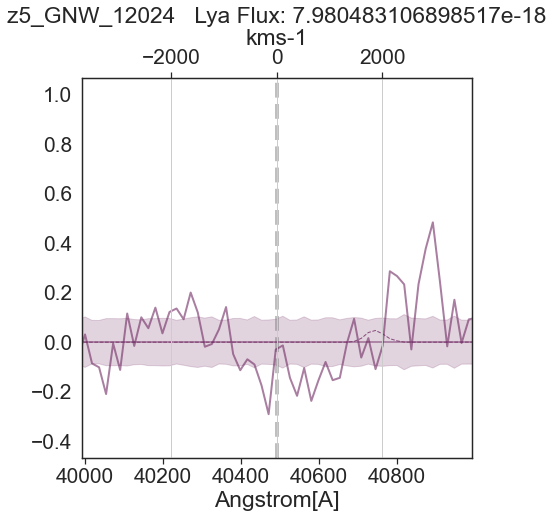

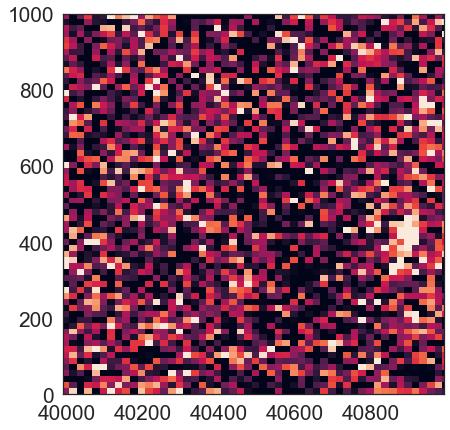

17056
6.049667650225273
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


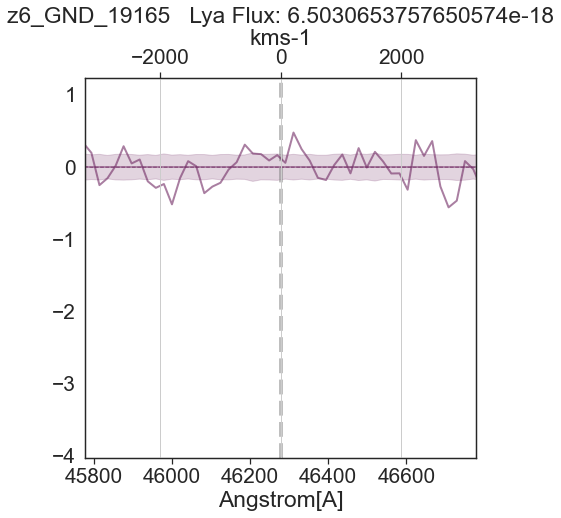

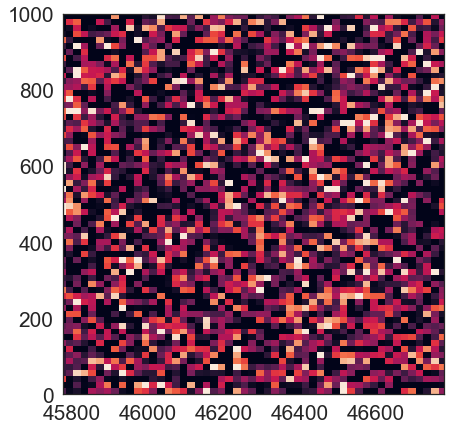

21172
5.9677187764744275
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


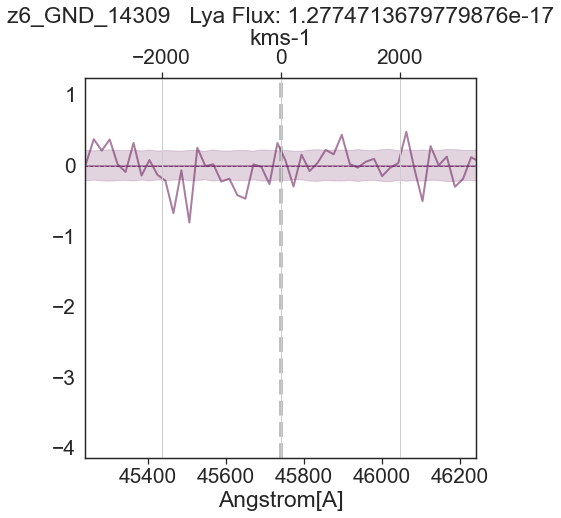

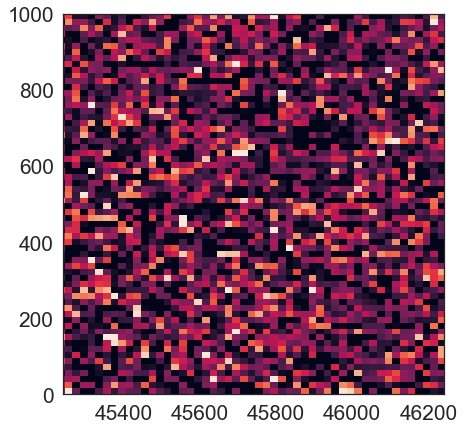

00789
5.769960179845872
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


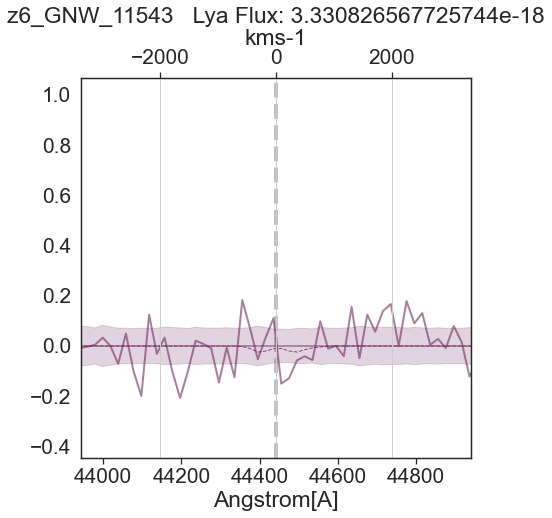

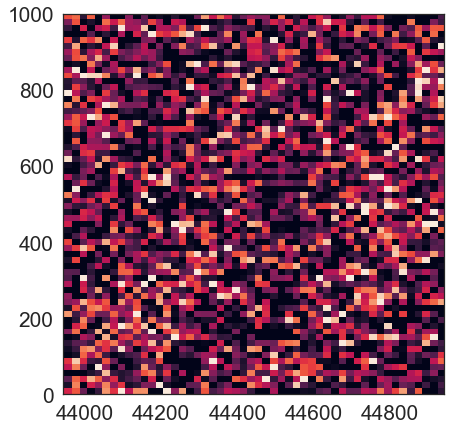

23355
6.509232237478478
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


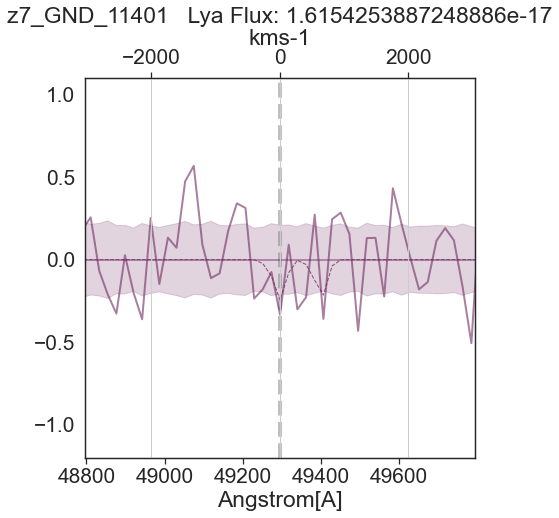

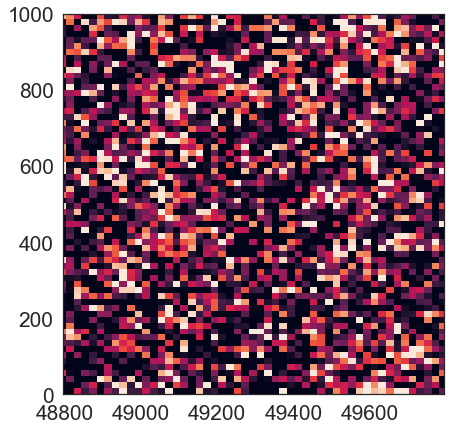

28342
6.121740345183027
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


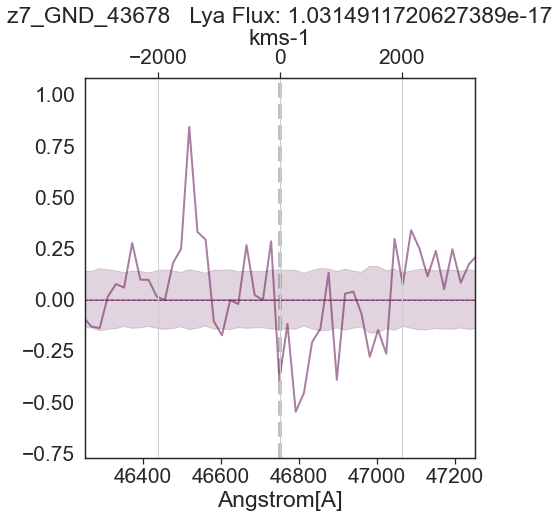

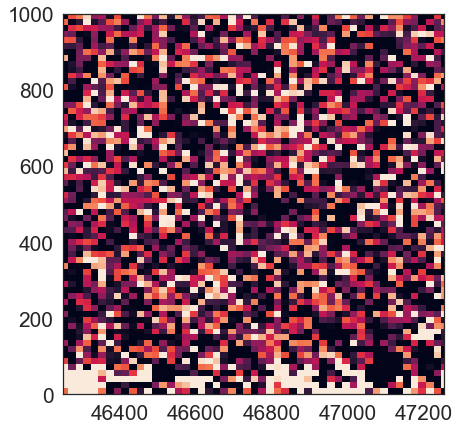

12607
6.58500311635492
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


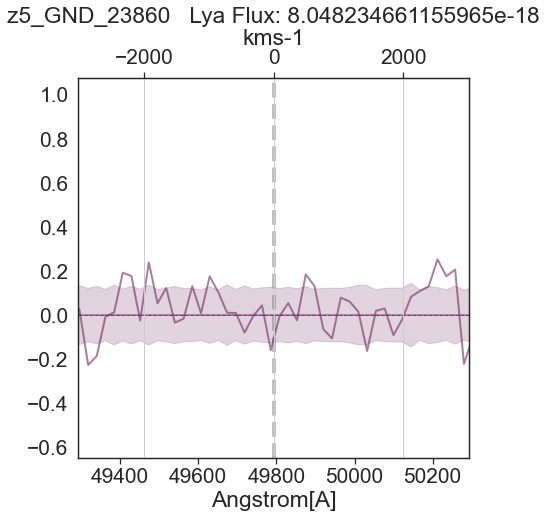

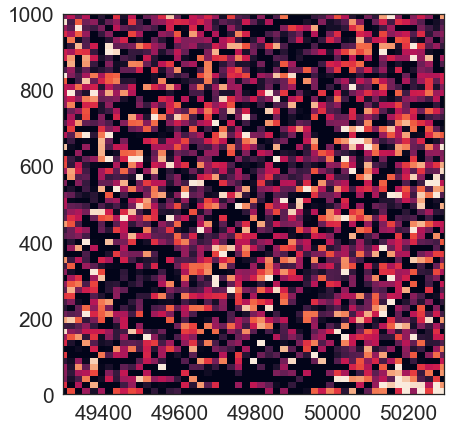

24946
6.011191597375274
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


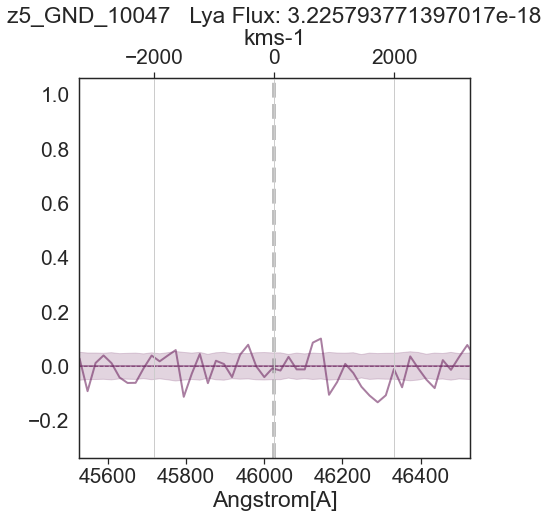

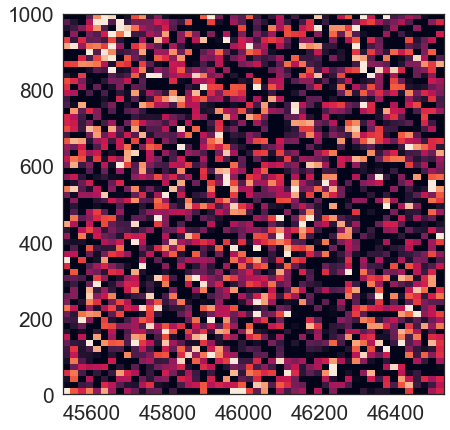

04350
6.874496145275204
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


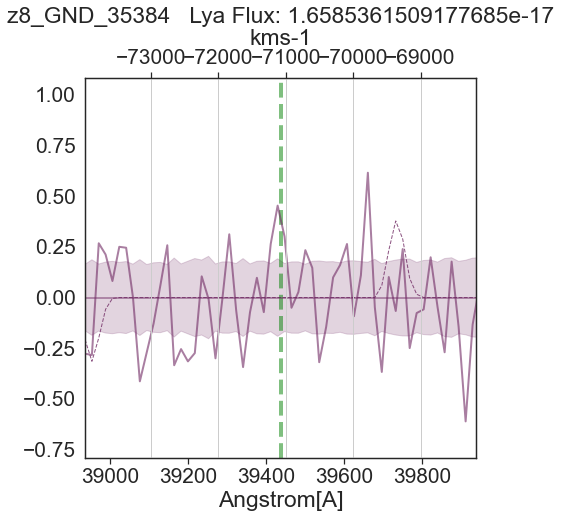

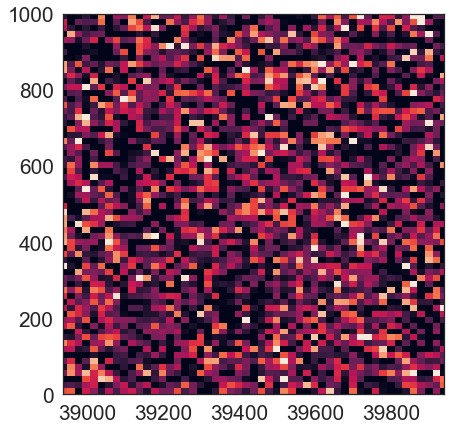

16299
5.708908356664348
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


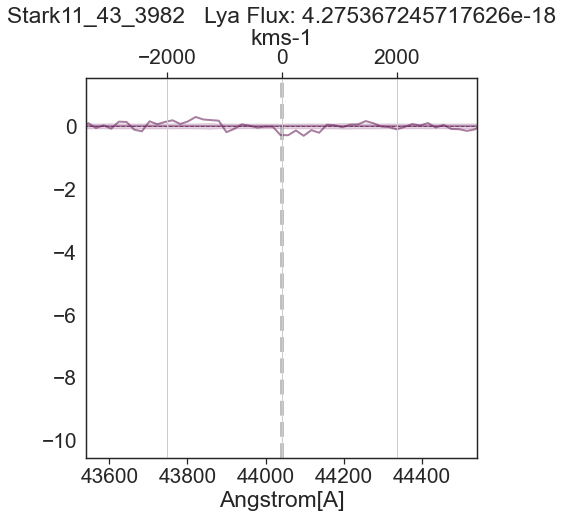

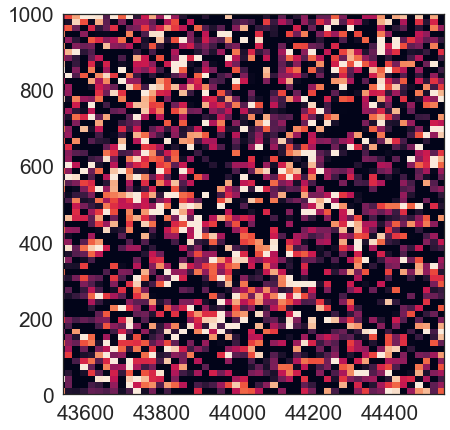

30776
6.587129426687153
38208.584494237555 50802.54773372237


<ipython-input-41-e0b3b11f5233>:40: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")


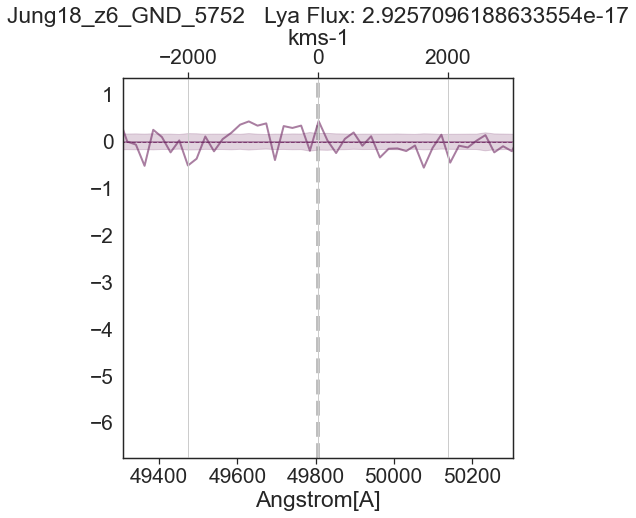

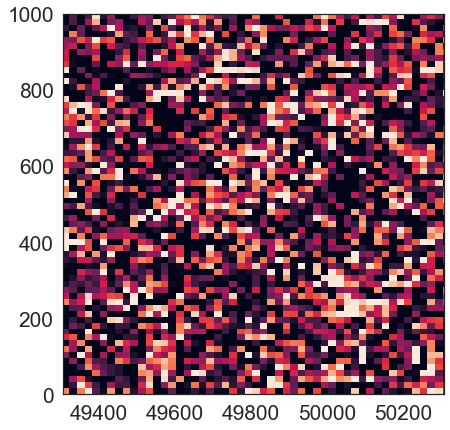

In [41]:
from scipy import interpolate
import ipympl
%load_ext autoreload
%autoreload 
%matplotlib inline




for i in range(0,len(ids)):
    if CatBino[i]['id_charlotte'] in noLyaID:

        print(ids[i])
        f=fits.open("../data/large_files/Fresco/fresco-gdn-med_"+ids[i]+".1D.fits")
        f2D=fits.open("../data/large_files/Fresco/2D/fresco-gdn-med_"+ids[i]+".stack.fits")
        sns.set_theme(style="white",font_scale = 1.9)
        plt.rcParams["figure.figsize"] = (7,7)
        fig, ax1 = plt.subplots()
        print(CatBino[i]['z'])
        Ha=6564.614*(1+CatBino[i]['z'])
        Oiii=5008.239*(1+CatBino[i]['z'])

        print(min(f[1].data["wave"]),max(f[1].data["wave"]))
        Wave=angstromTokms(Ha,f[1].data["wave"])
        oriWave=f[1].data["wave"]


        ax1.axhline(y=0,color="#702963",alpha=0.6)
        ax1.plot(oriWave,f[1].data["line"]/max(f[1].data["line"]),lw=1,color="#702963",ls="--",alpha=0.8,zorder=0)
        ax1.plot(oriWave,f[1].data["flux"]/max(f[1].data["flux"]),lw=2,color="#702963",alpha=0.6,zorder=100)

        ax1.fill_between(oriWave,-f[1].data["err"]/max(f[1].data["flux"]),f[1].data["err"]/max(f[1].data["flux"]),color='#702963',alpha=0.2,zorder=-10)
        ax1.set_xlabel("Angstrom[A]")
        ax1.tick_params('y')


        # Create the second x-axis
        ax2 = ax1.twiny()

        ax2.plot(Wave,f[1].data["flux"]/f[1].data["flux"]," ")
        ax2.tick_params('y', colors='r')
        ax2.set_xlabel("kms-1")


        ax1.axvline(x=Ha,ls="--",color="grey",label="Expected Ha",alpha=0.5,lw=4,zorder=0)
        ax1.axvline(x=Oiii,ls="--",color="green",label="Expected oiii",alpha=0.5,lw=4,zorder=0)

        f = interpolate.interp1d(oriWave, Wave)

        Ha=Ha
        try:
            x_min = Ha-500#min(oriWave)
            x_max = Ha+500#max(oriWave)
            vv=[f(x_min), f(x_max)]
        except:
            Ha=Oiii
            
        Limit=True
        if Limit==True:
            x_min = Ha-500#min(oriWave)
            x_max = Ha+500#max(oriWave)
            ax1.set_xlim(x_min, x_max)
            ax2.set_xlim(f(x_min), f(x_max))
        if Limit==False:
            x_min = min(oriWave)
            x_max = max(oriWave)
            ax1.set_xlim(x_min, x_max)
            ax2.set_xlim(f(x_min), f(x_max))

        plt.title(str(CatBino[i]['id_charlotte'])+"   Lya Flux: "+str(LyaFlux[i]))

        plt.grid()

        plt.show()

        plt.rcParams["figure.figsize"] = (7,7)
        fig, ax1 = plt.subplots()
        ax1.imshow(f2D[1].data,extent=[min(oriWave),max(oriWave),0,1000],aspect=1,vmin=-0.003,vmax=0.01)
        ax1.set_xlim(x_min, x_max)


        plt.show()

In [17]:
ids[i]
print(noLyaID)

['z5_GNW_12024', 'z6_GND_19165', 'z6_GND_14309', 'z6_GNW_11543', 'z7_GND_11401', 'z7_GND_43678', 'z5_GND_23860', 'z5_GND_10047', 'z8_GND_35384', 'Stark11_43_3982', 'Jung18_z6_GND_5752']


##### Fitting

In [ ]:
def FitGaussian(wave,Flux,FluxErr,lineWave,ShowPlots=True):
    inValues=[1,lineWave,5,0]
    labels = ["Amp","Mean", "FWHM","C"]

    stp=1500
    discard=1000
    walknum=50
    sampler,logprob=MCMC.runMCMC([wave,Flux,FluxErr],inValues,lineWave,steps=stp,nwalkers=walknum)
    if ShowPlots==True:
        MCMC.plotChain(sampler,labels)
        MCMC.plotCorner(sampler,labels,discard=discard)
        MCMC.plotModels(sampler,wave,Flux,FluxErr,discard=discard)

    pairs,ampVals,meanVals,stdVals,cVals=MCMC.returnParameters(sampler,discard=discard)
    return meanVals,stdVals#betaVals[1],MuvVals[1],[betaErr,MuvErr],[Flux,FluxErr],pairs


In [ ]:
%load_ext autoreload
%autoreload
ln=["Ha","Oiii"]
for gal in PObj:
    print(gal.ID)
    f=fits.open("../data/large_files/Fresco/fresco-gdn-med_"+gal.IDFresco+".1D.fits")
    wave,flux,err=f[1].data["wave"],f[1].data["flux"],f[1].data["err"]

    tempM={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}
    tempS={"ID":gal.ID,"zLya":gal.zLya,"Ha":np.array([np.nan,np.nan,np.nan]),"Oiii":np.array([np.nan,np.nan,np.nan])}

    for l in ln:
        if getattr(gal, "aWave"+l)=="X":
            continue
        
        approxWave=float(getattr(gal, "aWave"+l))
        mask=(wave>approxWave-200)&(wave<approxWave+200)
        wave,flux,err=wave[mask],flux[mask],err[mask]
        #flux[flux<0]=0.0
        #plt.plot(wave,flux)
        #plt.show()
        m,s=FitGaussian(wave,flux,err,approxWave,ShowPlots=False)
        tempM[l]=m
        tempS[l]=s
    gal.giveWave(tempM)
    gal.giveFWHM(tempS)
    


In [ ]:
%load_ext autoreload
%autoreload
for gal in PObj:
    gal.getOffset()
    gal.getFWHM()


In [ ]:
#Alldata=[slopes,Muv,FWHM,LyaLum,Skewness,EW,maskLAE,cat,dEW,dSlp,dMuv
AllData=np.load("../Catalogs/AllData.npy",allow_pickle=True).transpose()
for gal in PObj:
    for data in AllData:
        if gal.ID==data[7][1]:
            setattr(gal,"Muv",[data[1],data[10]])
            setattr(gal,"EW",[data[5],data[8]])


In [ ]:
Muvs=np.array([gal.Muv for gal in PObj])
Ews=[gal.EW[0] for gal in PObj]
Offset=np.array([gal.off for gal in PObj])
FWHM=[gal.fwhm[1] for gal in PObj]
zs=[gal.zLya for gal in PObj]


def GetPlottable(vals):
    val=vals[:,1]
    val_minus=np.abs(vals[:,1]-vals[:,0])
    val_plus=np.abs(vals[:,2]-vals[:,1])
    return np.array([val,val_minus,val_plus])

Offset=GetPlottable(Offset)

def AddIntrinsic(Offset):
    O1=np.sqrt(Offset[1]**2+60**2)
    O2=np.sqrt(Offset[2]**2+60**2)
    return[Offset[0],O1,O2]

#Offset=AddIntrinsic(Offset)

np.save("../Catalogs/Muvs.npy",Muvs.transpose())
np.save("../Catalogs/Offset.npy",Offset)
np.save("../Catalogs/zs.npy",zs)

In [ ]:
plt.scatter(Muvs[:,0],Offset[0])
plt.show()

plt.scatter(Ews,Offset[0])
plt.xlim()
plt.show()

#plt.scatter(FWHM,Offset)
#plt.show()

In [ ]:
for p in PObj:
    print(p.ID,p.off[1])

In [ ]:
list(Ews)

In [ ]:
list(Offset[0])